<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Модель-Линейная-регрессия." data-toc-modified-id="Модель-Линейная-регрессия.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модель Линейная регрессия.</a></span></li><li><span><a href="#Модель-Решающее-дерево" data-toc-modified-id="Модель-Решающее-дерево-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модель Решающее дерево</a></span></li><li><span><a href="#Модель-Случайный-лес" data-toc-modified-id="Модель-Случайный-лес-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель Случайный лес</a></span></li></ul></li></ul></div>

# Восстановление золота из руды

<b>Задача подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.<b/>

<b>Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки.<b/>

<b>Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.<b/>

План работы:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

<b>Данные находятся в трёх файлах:</b>

•	gold_recovery_train_new.csv — обучающая выборка;

•	gold_recovery_test_new.csv — тестовая выборка;

•	gold_recovery_full_new.csv — исходные данные, на этих данных я буду делать анализ.

<b>Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.
В вашем распоряжении сырые данные: их просто выгрузили из хранилища. </b>


## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [6]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [7]:
for i in [train, test, df]:
    print(f'\nКоличество пропусков в  датасете {get_df_name(i)} - ',i.isna().sum())


Количество пропусков в  датасете train -  date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

Количество пропусков в  датасете test -  date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level      

In [8]:
for i in [train, test, df]:
    print(f'\nКоличество явных дубликатов в  датасете {get_df_name(i)} - ',i.duplicated().sum())


Количество явных дубликатов в  датасете train -  0

Количество явных дубликатов в  датасете test -  0

Количество явных дубликатов в  датасете df -  0


<b>Во всех трех датасетах признак даты имеет формат object, которотый нужно привести к формату date. Также есть небольшое количество пропусков, явных дубликатов нет.</b>

In [9]:
for i in [train, test, df]:
    i['date'] = pd.to_datetime(i['date'], format='%Y-%m-%d %H:%M:%S')

<b>По условию задачи, известно, что данные индексируются датой и временем получения информации (признак date).<b/>

<b>Соседние по времени параметры часто похожи. Воспользуемся этим условием.<b/>

<b>С помощью функции ffill заполним отсутствующие значения в тренировочной и тестовой выборках. Функция заполняет пропуски предпоследним значением признака (значения даты расположены по возрастанию).<b/>

In [10]:
size_of_train_df_before = train.shape
size_of_test_df_before = test.shape
size_of_full_df_before = df.shape
train_df = train.ffill(axis=0)
test_df = test.ffill(axis=0)
full_df = df.ffill(axis=0)
print(f'\nРазмер тренировочной выборки - {size_of_train_df_before} и количество строк без пропусков - {len(train_df.notna())}')
print(f'\nРазмер тестовой выборки - {size_of_test_df_before} и количество строк без пропусков - {len(test_df.notna())}')
print(f'\nРазмер исходной выборки - {size_of_full_df_before} и количество строк без пропусков - {len(full_df.notna())}')


Размер тренировочной выборки - (14149, 87) и количество строк без пропусков - 14149

Размер тестовой выборки - (5290, 53) и количество строк без пропусков - 5290

Размер исходной выборки - (19439, 87) и количество строк без пропусков - 19439


<b>Проверю правильно ли рассчитана эффективность обогащения. Это параментр rougher.output.recovery, найду MAE между моими расчётами и значением признака.<b/>

Рассчет производится по формуле (C*(F-T))/(F*(C-T))*100, где:</div>

С - доля золота концентрате после фильтрации/очитски</div>

F - доля золота в сырье/концентрате до флотации/очистки</div>

T - доля золота в отвальных хвостах после фильтрации/очистки</div>


Принимая во внимание условие задачи, нам нужен этап флотации, а значит:</div>

C это rougher.output.concentrate_au</div>

F это rougher.input.feed_au</div>

T это rougher.output.tail_au</div>

In [11]:
C = train_df['rougher.output.concentrate_au']
F = train_df['rougher.input.feed_au']
T = train_df['rougher.output.tail_au']
recovery = ((C*(F-T))/(F*(C-T))) * 100

In [12]:
print('MAE -', mean_absolute_error(train_df['rougher.output.recovery'], recovery))

MAE - 9.73512347450521e-15


<b>MAE - средний модуль разности, и показывает как сильно предсказания в среднем отличаются от истинных значений. Полученное значение мало, а значит расчеты верны.<b/>

<b>Проанализирую признаки, которые отсутстуют в тестовом датасете, но имеются в тренировочном.<b/>

In [13]:
dif_columns = set(train.columns) - set(test.columns)
print(dif_columns)
print(f'\n Тестовый и тренировочный датасет различаются на {len(dif_columns)} признака.')

{'final.output.concentrate_sol', 'primary_cleaner.output.tail_pb', 'rougher.output.concentrate_ag', 'secondary_cleaner.output.tail_sol', 'primary_cleaner.output.concentrate_pb', 'secondary_cleaner.output.tail_pb', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'rougher.output.tail_au', 'rougher.output.tail_sol', 'final.output.tail_au', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'final.output.tail_ag', 'primary_cleaner.output.tail_sol', 'final.output.tail_sol', 'rougher.output.tail_pb', 'rougher.output.tail_ag', 'final.output.tail_pb', 'secondary_cleaner.output.tail_au', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.output.recovery', 'rougher.calculation.au_pb_ratio', 'rougher.calculation.sulfate_to_au_concentrate', 'primary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_ag', 'final.output.concentrate_au', 'primary_cleaner.output.concentrate_sol', 'f

<b>Разберусь детально, что это за признаки.<b/>

In [14]:
dict_with_name_of_values = {'final': 'финальные характеристики',
                           'primary_cleaner': 'первичная очистка',
                           'secondary_cleaner': 'вторичная очистка',
                           'input': 'параметры сырья',
                           'output': 'параметры продукта',
                           'rougher': 'флотация',
                           'state': 'параметры, характеризующие текущее состояние этапа',
                           'calculation': 'расчётные характеристики'}

In [15]:
dict_for_dif_columns = {}
for col in dif_columns:
    list_with_words = col.split('.')
    stage = list_with_words[0]+'-'+list_with_words[1]
    if stage in dict_for_dif_columns:
        dict_for_dif_columns[stage].append(list_with_words[2])
    elif stage not in dict_for_dif_columns:
        dict_for_dif_columns[stage] = [list_with_words[2]]
for key in dict_for_dif_columns.keys():
    split_key = key.split('-')
    print(f'ДЛЯ ЭТАПА "{(dict_with_name_of_values[split_key[0]]).upper()}" С ОПЦИЕЙ "{(dict_with_name_of_values[split_key[1]]).upper()}" ОТСУТСТВУЮТ ЗНАЧЕНИЯ:')
    for elem in dict_for_dif_columns[key]:
        print(f' - {elem}')

ДЛЯ ЭТАПА "ФИНАЛЬНЫЕ ХАРАКТЕРИСТИКИ" С ОПЦИЕЙ "ПАРАМЕТРЫ ПРОДУКТА" ОТСУТСТВУЮТ ЗНАЧЕНИЯ:
 - concentrate_sol
 - tail_au
 - tail_ag
 - tail_sol
 - tail_pb
 - concentrate_au
 - recovery
 - concentrate_ag
 - concentrate_pb
ДЛЯ ЭТАПА "ПЕРВИЧНАЯ ОЧИСТКА" С ОПЦИЕЙ "ПАРАМЕТРЫ ПРОДУКТА" ОТСУТСТВУЮТ ЗНАЧЕНИЯ:
 - tail_pb
 - concentrate_pb
 - concentrate_au
 - concentrate_ag
 - tail_sol
 - tail_ag
 - concentrate_sol
 - tail_au
ДЛЯ ЭТАПА "ФЛОТАЦИЯ" С ОПЦИЕЙ "ПАРАМЕТРЫ ПРОДУКТА" ОТСУТСТВУЮТ ЗНАЧЕНИЯ:
 - concentrate_ag
 - tail_au
 - tail_sol
 - concentrate_pb
 - concentrate_sol
 - tail_pb
 - tail_ag
 - recovery
 - concentrate_au
ДЛЯ ЭТАПА "ВТОРИЧНАЯ ОЧИСТКА" С ОПЦИЕЙ "ПАРАМЕТРЫ ПРОДУКТА" ОТСУТСТВУЮТ ЗНАЧЕНИЯ:
 - tail_sol
 - tail_pb
 - tail_au
 - tail_ag
ДЛЯ ЭТАПА "ФЛОТАЦИЯ" С ОПЦИЕЙ "РАСЧЁТНЫЕ ХАРАКТЕРИСТИКИ" ОТСУТСТВУЮТ ЗНАЧЕНИЯ:
 - floatbank11_sulfate_to_au_feed
 - floatbank10_sulfate_to_au_feed
 - au_pb_ratio
 - sulfate_to_au_concentrate


<b>В тесте у нас нет признаков output, так как это целевые признаки.<b/>

<b>Так же в тесте нет признаков calculation для этапа rougher, видимо эти данные рассчитываются позднее (по условию задачи) и не доступны во время процесса.<b/>

In [16]:
test_df = test_df.merge(full_df.loc[:, ['date','rougher.output.recovery','final.output.recovery']], on='date')

<b>В завершающем шаге предобработки данных считаю нужным удалить колонку date, как не информативную для дальнейшего обучения модели.<b/>

In [17]:
train_df = train_df.drop('date', axis=1)
test_df = test_df.drop('date', axis=1)
print(f'\nРазмер тренировочной выборки - {train_df.shape}')
print(f'\nРазмер тестовой выборки - {test_df.shape}')


Размер тренировочной выборки - (14149, 86)

Размер тестовой выборки - (5290, 54)


Вывод


<b>В данных:

Был изменен тип данных для колонки date с object на datetime. В остальных признаках типы данных соответствуют содержимому.
Регистр соответствует стандарту snake_case.


Пропуски в датасетах (тренировочная выборки и тестовая) были заполнены значениями предшествующими по времени (Так как в условии задачи сказано, что : "Соседние по времени параметры часто похожи").


Проверена правильность расчета эффективности обогащения. МАЕ равно предельно малому значению (отличие предсказаний от истинных значений).


В сравнение с тренировчной выборкой в тестовой отсутствуют 34 значения, это может быть связано с тем, что они замеряются и/или рассчитываются значительно позже.


В тестовую выборку были добавлены целевые признаки (rougher.output.recovery, final.output.recovery), которые будут необходимы в дальнейшем для рассчета итоговой метрики качества.


Колонка date была удалена как не информативна для дальнейшего обучения модели.</b>

## Анализ данных

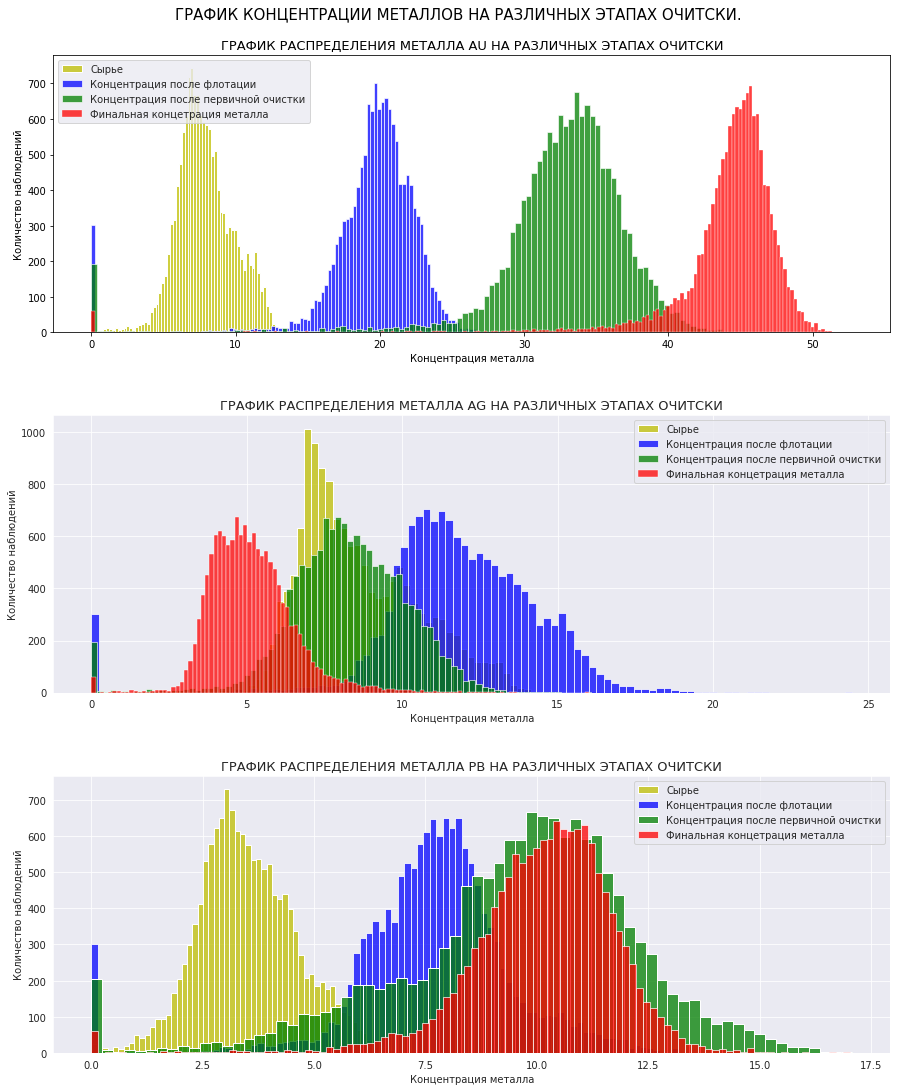

In [18]:
position = 0
plt.figure(figsize=[15, 17])
plt.subplots_adjust(top=0.94, wspace=0.2, hspace=0.3)
plt.suptitle('ГРАФИК КОНЦЕНТРАЦИИ МЕТАЛЛОВ НА РАЗЛИЧНЫХ ЭТАПАХ ОЧИТСКИ.', fontsize=15)
for metal in ['au', 'ag', 'pb']:
    position += 1
    plt.subplot(3, 1, position)
    plt.title(f'ГРАФИК РАСПРЕДЕЛЕНИЯ МЕТАЛЛА {str(metal).upper()} НА РАЗЛИЧНЫХ ЭТАПАХ ОЧИТСКИ', fontsize=13)
    sns.set_style('darkgrid')
    sns.histplot(train_df[f'rougher.input.feed_{metal}'], color='y', label='Сырье', kde=False)
    sns.histplot(train_df[f'rougher.output.concentrate_{metal}'], color='b', label='Концентрация после флотации', kde=False)
    sns.histplot(train_df[f'primary_cleaner.output.concentrate_{metal}'], color='g', label='Концентрация после первичной очистки', kde=False)
    sns.histplot(train_df[f'final.output.concentrate_{metal}'], color='r', label='Финальная концетрация металла',kde=False)
    plt.xlabel('Концентрация металла')
    plt.ylabel('Количество наблюдений')
    plt.legend()
plt.show();

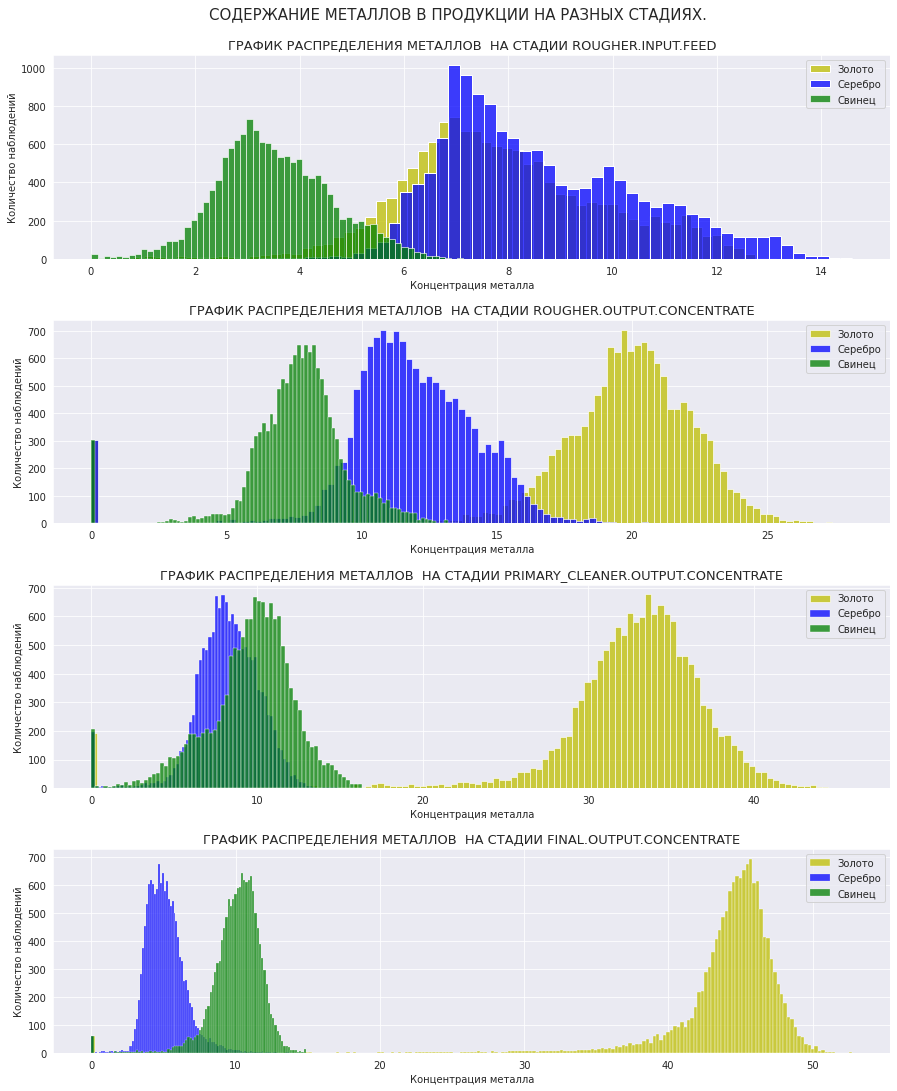

In [19]:
position = 0
plt.figure(figsize=[15, 17])
plt.subplots_adjust(top=0.94, wspace=0.2, hspace=0.3)
plt.suptitle('СОДЕРЖАНИЕ МЕТАЛЛОВ В ПРОДУКЦИИ НА РАЗНЫХ СТАДИЯХ.', fontsize=15)
for stage in ['rougher.input.feed', 'rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']:
    position += 1
    plt.subplot(4, 1, position)
    plt.title(f'ГРАФИК РАСПРЕДЕЛЕНИЯ МЕТАЛЛОВ  НА СТАДИИ {str(stage).upper()}', fontsize=13)
    sns.set_style('darkgrid')
    sns.histplot(train_df[f'{stage}_au'], color='y', label='Золото', kde=False)
    sns.histplot(train_df[f'{stage}_ag'], color='b', label='Серебро', kde=False)
    sns.histplot(train_df[f'{stage}_pb'], color='g', label='Свинец', kde=False)
   
    plt.xlabel('Концентрация металла')
    plt.ylabel('Количество наблюдений')
    plt.legend()
plt.show();

<b>Концентрация металлов меняется неравномерно от стадии к стадии:
    
    В первноначальной руде концентрация серебра самая высокая, золота тоже высокая, но ниже, чем у серебра, а свинец имеет очень низкую концентрацию, в среднем около 4.
    
    Серебро после флотации снижается, Свинец незначительно растёт в течении всего процесса, Золото Растёт с каждым этапом.
    
    На каждой стадии очистки концентрация металлов возрастает, но концентрация золота растет быстрее серебра и свинца, и в конечном продукте эта разница уже максимальная, золото около 45,свинец в районе 10, а концентрация серебра даже уменьшается.

<b>Проверю различаются ли показатели по сырью в тренировочном и тестовом датасетах. <b/>

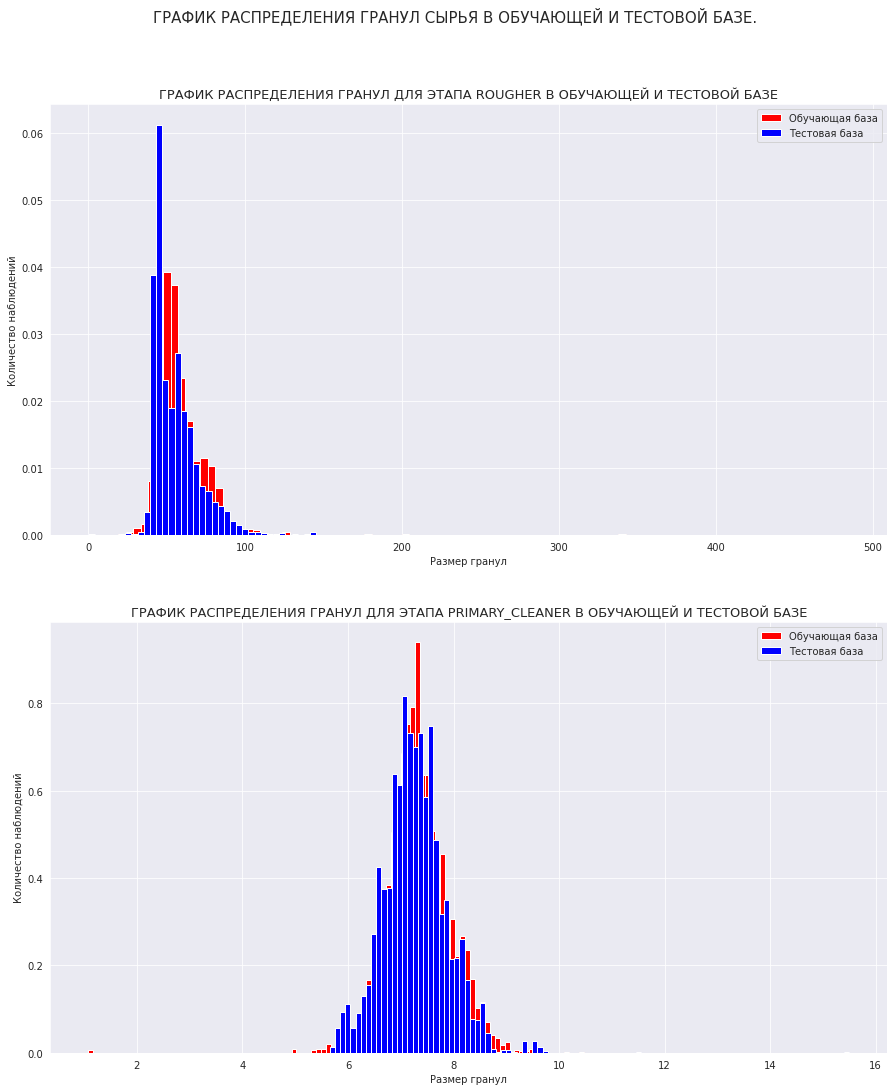

In [20]:
position = 0
plt.figure(figsize=[15, 17])
plt.subplots_adjust(top=0.90, wspace=0.2, hspace=0.2)
plt.suptitle('ГРАФИК РАСПРЕДЕЛЕНИЯ ГРАНУЛ СЫРЬЯ В ОБУЧАЮЩЕЙ И ТЕСТОВОЙ БАЗЕ.', fontsize=15)
for stage in ['rougher', 'primary_cleaner']:
    position += 1
    plt.subplot(2, 1, position)
    plt.title(f'ГРАФИК РАСПРЕДЕЛЕНИЯ ГРАНУЛ ДЛЯ ЭТАПА {str(stage).upper()} В ОБУЧАЮЩЕЙ И ТЕСТОВОЙ БАЗЕ', fontsize=13)
    sns.set_style('darkgrid')
    plt.hist(train_df[f'{stage}.input.feed_size'], bins=100, color='r', label='Обучающая база', density=True)
    plt.hist(test_df[f'{stage}.input.feed_size'], bins=100, color='b', label='Тестовая база', density=True)
    plt.xlabel('Размер гранул')
    plt.ylabel('Количество наблюдений')
    plt.legend()
plt.show();

<b>Для этапа флотации распределение гранул находится примерно в одинаковом диапазоне, но для тренировочной выборки преобладают гранулы с размером ~ 50 , а для тестовой наоборот, ниже порога 50.<b/>

<b>Для этапа первичной очитски разспределение гранул для выборок находится в одном диапазоне, однако есть различия в количестве наблюдений. Так для тренировочной выборки количество наблюдений размера гранул больше, чем для тестовой.<b/>

<b>Таким образом, значимых различий между распределениями для выборок не наблюдается.<b/>

<b>Исследую суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.<b/>

In [21]:
sum_concentrate_of_rougher_input = 0
sum_concentrate_of_rougher_output = 0
sum_concentrate_of_primary_cleaner_output = 0
sum_concentrate_of_final_output = 0
for metal in ['au', 'ag', 'pb', 'sol']:
    sum_concentrate_of_rougher_input += train_df[f'rougher.input.feed_{metal}']
    sum_concentrate_of_rougher_output += train_df[f'rougher.output.concentrate_{metal}']
    sum_concentrate_of_primary_cleaner_output += full_df[f'primary_cleaner.output.concentrate_{metal}']
    sum_concentrate_of_final_output += train_df[f'final.output.concentrate_{metal}']

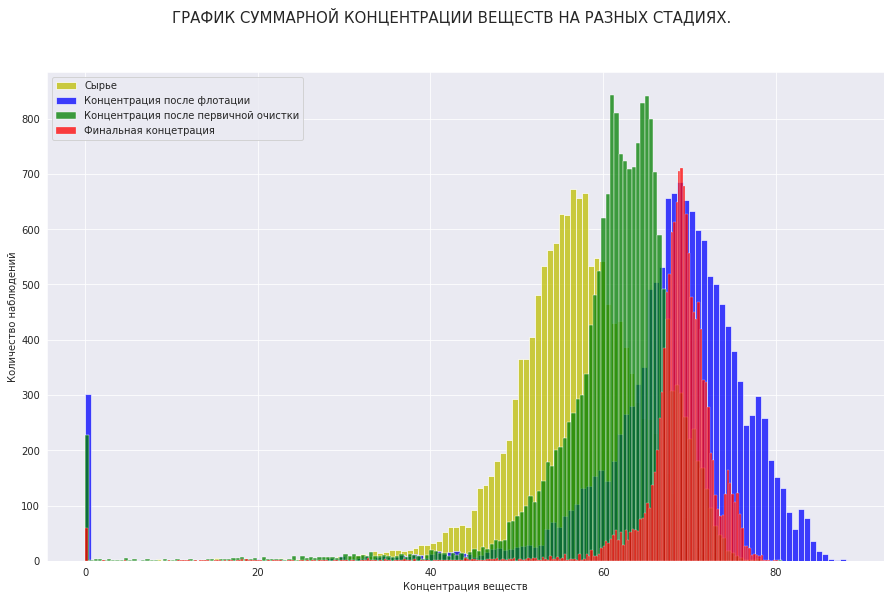

In [22]:
plt.figure(figsize=[15, 9])
plt.suptitle('ГРАФИК СУММАРНОЙ КОНЦЕНТРАЦИИ ВЕЩЕСТВ НА РАЗНЫХ СТАДИЯХ.', fontsize=15)
sns.set_style('darkgrid')
sns.histplot(sum_concentrate_of_rougher_input, color='y', label='Сырье', kde=False)
sns.histplot(sum_concentrate_of_rougher_output, color='b', label='Концентрация после флотации', kde=False)
sns.histplot(sum_concentrate_of_primary_cleaner_output, color='g', label='Концентрация после первичной очистки', kde=False)
sns.histplot(sum_concentrate_of_final_output, color='r', label='Финальная концетрация',kde=False)
plt.xlabel('Концентрация веществ')
plt.ylabel('Количество наблюдений')
plt.legend()
plt.show();

<b>Вывод:
    
    Суммарная концентрация веществ увеличивается к финальному этапу, а диапазон распределения суммарной концентрации веществ уменьшается. Есть выбросы на нуле.

<b>Для финального и этапа флотации для суммарной концентрации веществ присутствуют аномалии ( значения в районе 0). Считаю необходимым удалить аномалии из данных. Аномалии могут негативно повлиять на качество обучения модели.<b/>

In [23]:
train_df = train_df[(train_df['rougher.output.concentrate_au'] != 0) & (train_df['rougher.output.concentrate_ag'] != 0) & (train_df['rougher.output.concentrate_pb'] != 0) & (train_df['rougher.output.concentrate_sol'] != 0)]
train_df = train_df[(train_df['final.output.concentrate_au'] != 0) & (train_df['final.output.concentrate_ag'] != 0) & (train_df['final.output.concentrate_pb'] != 0) & (train_df['final.output.concentrate_sol'] != 0)]

full_df = full_df[(full_df['rougher.output.concentrate_au'] != 0) & (full_df['rougher.output.concentrate_ag'] != 0) & (full_df['rougher.output.concentrate_pb'] != 0) & (full_df['rougher.output.concentrate_sol'] != 0)]
full_df = full_df[(full_df['final.output.concentrate_au'] != 0) & (full_df['final.output.concentrate_ag'] != 0) & (full_df['final.output.concentrate_pb'] != 0) & (full_df['final.output.concentrate_sol'] != 0)]

<b>Вывод:

    Распределения гранул сырья на обучающей и тестовой выборках значительных различий не имеют

    Доля золота увеличивается по мере прохождения этапов очистки

    В анализа суммарной концентрации веществ на разных стадиях были выявлены аномалии, которые были удалены для улучшения качества будущих моделей прогнозирования.

## Модель

<b>Создаю функцию для вычисления итоговой sMAPE.<b/>

In [24]:
def get_smape(target, predict):
    smape = (1/len(target))*np.sum((np.abs(target - predict))/( (np.abs(target)+np.abs(predict))/2))*100
    return smape

In [25]:
smape_scorer = make_scorer(get_smape, greater_is_better = False)

In [26]:
def get_final_smape(rougher, final):
    final = 0.25*rougher+0.75*final
    return final

<b>Для качественного обучения модели нужно удалить из тренировочной базы лишние признаки и перемешать данные, для этого я оставлю в качестве признаков только те колонки, которые есть в тестовой базе. Но для начала сохраним целевые признаки.<b/>

In [27]:
train_df = shuffle(train_df)
test_df = shuffle(test_df)

In [28]:
target_rougher=train_df['rougher.output.recovery']
target_final=train_df['final.output.recovery']

In [29]:
columns_test=test_df.columns
features = train_df[columns_test]
features = features.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

In [30]:
features_test = test_df.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_rougher_test = test_df['rougher.output.recovery']
target_final_test = test_df['final.output.recovery']

<b>Обучу разные модели и оценю их качество, используя кросс-валидацию.<b/>

In [31]:
dct_with_scores = {}

### Модель Линейная регрессия.

In [32]:
numeric = features.columns

scaler = StandardScaler()
scaler.fit(features[numeric])
features[numeric] = scaler.transform(features[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [33]:
model_lr_rougher = LinearRegression()
model_lr_rougher.fit(features, target_rougher)
smape_rougher = cross_val_score(model_lr_rougher,
                          features,
                          target_rougher,
                          scoring=smape_scorer,
                          cv=5)
final_smape_rougher = smape_rougher.mean()

In [34]:
model_lr_final = LinearRegression()
smape_final = cross_val_score(model_lr_final,
                        features,
                        target_final,
                        scoring=smape_scorer,
                        cv=5)
final_smape_final = smape_final.mean()
result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
dct_with_scores['LR'] = [result_smape]

### Модель Решающее дерево

In [35]:
%%time
best_result_for_dt = 100
best_param_for_dt = 0
for n in range(1, 20, 1):
    model_dt_rougher = DecisionTreeRegressor(max_depth=n, random_state=12345)
    model_dt_rougher.fit(features, target_rougher)
    smape_rougher = cross_val_score(model_dt_rougher,
                              features,
                              target_rougher,
                              scoring=smape_scorer,
                              cv=5)
    final_smape_rougher = smape_rougher.mean()

    model_dt_final = DecisionTreeRegressor(max_depth=n, random_state=12345)
    smape_final = cross_val_score(model_dt_final, 
                                  features,
                                  target_final,
                                  scoring=smape_scorer,
                                  cv=5)
    final_smape_final = smape_final.mean()
    result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
    if result_smape < best_result_for_dt:
        best_result_for_dt = result_smape
        best_param_for_dt = n
dct_with_scores['DT'] = [best_result_for_dt, best_param_for_dt]
print('Лучший параметр глубины:', best_param_for_dt)

Лучший параметр глубины: 11
CPU times: user 1min 45s, sys: 177 ms, total: 1min 45s
Wall time: 1min 45s


### Модель Случайный лес

In [36]:
%%time
best_model_for_rf = 100
best_param_for_rf = 0
for n in range(20, 100, 20):
    for d in range(2,10,2):
        model_rf_rougher = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=12345)
        model_rf_rougher.fit(features, target_rougher)
        smape_rougher = cross_val_score(model_rf_rougher,
                                  features,
                                  target_rougher,
                                  scoring=smape_scorer,
                                  cv=5)
        final_smape_rougher = smape_rougher.mean()

        model_rf_final = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=12345)
        smape_final = cross_val_score(model_rf_final,
                                features,
                                target_final,
                                scoring=smape_scorer,
                                cv=5)
        final_smape_final = smape_final.mean()
        result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
        if result_smape < best_model_for_rf:
            best_model_for_rf = result_smape
            best_param_for_rf = [n,d]
dct_with_scores['RF'] = [best_model_for_rf, best_param_for_rf]
print(f'\nЛучший парметр количества деревьев {best_param_for_rf[0]} и глубины {best_param_for_rf[1]}.')


Лучший парметр количества деревьев 80 и глубины 8.
CPU times: user 26min 25s, sys: 2.29 s, total: 26min 27s
Wall time: 26min 28s


In [37]:
for key in dct_with_scores.keys():
    print(f'\nМОДЕЛЬ {str(key).upper()} С РЕЗУЛЬТАТОМ - {dct_with_scores[key][0]}')


МОДЕЛЬ LR С РЕЗУЛЬТАТОМ - 7.281077242719288

МОДЕЛЬ DT С РЕЗУЛЬТАТОМ - 6.45181163785028

МОДЕЛЬ RF С РЕЗУЛЬТАТОМ - 5.99557246652055


<b>Лучшие результаты показала модель Случайный лес с гиперпараментрами глубиной = 8 и количеством деревьев = 80.<b/>

# Тестирование и анализ лучшей модели.

<b>Проверю качество модели на тестовой выборке.<b/>

In [38]:
model_test_rougher = RandomForestRegressor(n_estimators=80, max_depth=8, random_state=12345)
model_test_rougher.fit(features, target_rougher)
predicted_rougher = model_test_rougher.predict(features_test)

model_test_final = RandomForestRegressor(n_estimators=80, max_depth=8, random_state=12345)
model_test_final.fit(features, target_final)
predicted_final = model_test_final.predict(features_test)

smape_for_test_rougher = get_smape(target_rougher_test, predicted_rougher)
smape_for_test_final = get_smape(target_final_test, predicted_final)
final_smape_for_test = get_final_smape(smape_for_test_rougher, smape_for_test_final)

In [39]:
print(f'\nSMAPE ДЛЯ ТЕСТОВОЙ ВЫБОРКИ СОСТАВЛЯЕТ - {final_smape_for_test}')


SMAPE ДЛЯ ТЕСТОВОЙ ВЫБОРКИ СОСТАВЛЯЕТ - 9.181252729144637


<b>Проверим полученную модель на адекватность. Вычислим показатель sMape для константной модели и сравним с результатами лучшей модели.<b>

In [40]:
dummy_regr_rougher = DummyRegressor(strategy="mean")
dummy_regr_final = DummyRegressor(strategy="mean")

dummy_regr_rougher.fit(features, target_rougher)
dummy_regr_final.fit(features, target_final)

dummy_predicted_rougher = dummy_regr_rougher.predict(features_test)
dummy_predicted_final = dummy_regr_final.predict(features_test)

smape_for_const_rougher = get_smape(target_rougher_test, dummy_predicted_rougher)
smape_for_const_final = get_smape(target_final_test, dummy_predicted_final)

final_smape_for_const = get_final_smape(smape_for_const_rougher, smape_for_const_final)

In [41]:
print(f'\nПОКАЗАТЕЛЬ SMAPE ДЛЯ КОНСТАНТНОЙ МОДЕЛИ - {final_smape_for_const}')


ПОКАЗАТЕЛЬ SMAPE ДЛЯ КОНСТАНТНОЙ МОДЕЛИ - 9.821468391820268


<b>Показатель модели RandomForestRegressor меньше показателя константной, что означает хорошее качество полученной модели.<b/>

# Итоговый вывод.

<b>Задачей проекта было подготовить прототип модели машинного обучения для «Цифры» в целях предсказания коэффициента восстановления золота из золотосодержащей руды, чтобы оптимизировать производство и не запускать предприятие с убыточными характеристиками.<b/>

<b>Я загрузила и изучила данные, заполнила небольшое количество пропусков значениями по ближайшим временным значениям, изучила различия в датасетах.<b/>
    
<b>Провела анализ данных по концентрации всех видов руды на разных стадиях очистки и обогащения.<b/>
    
<b>Я обучила три модели машинного обучения Линейнуй регрессию, Решающее дерево и Случайный лес, из которых наилучший результат показала последняя.<b/>

<b>Я протестировала модель Случайный лес на тестовой выборке и проверила на адекватность с помощью DummyRegressor, и модель оказалась хорошего качества, так что ее можно рекомендовать, как инструмент для предсказания коэффициента восстановления золота из золотосодержащей руды.<b/>
